# Preparation of  required Data

## 1) Getting the Johns Hopkins data from GITHUB in csv format

## 2) Putting the data of dates in a dataframe 

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 600)

### Getting the Johns Hopkins GITHUB csv data

In [2]:
# storing the Johns Hopkins GITHUB dataset in a variable and then reading it in csv format

data_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301


In [4]:
# Intial data extrcation of the dataset dates (which are in string format) and storing in a variable 'req_date'

req_date=pd_raw.columns[4:]

In [5]:
# Putting the 'req_date' to a data frame df_plot

df_plot = pd.DataFrame({
    'date':req_date})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0) # Checking the total data of the one country for the single date

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
7/23/22    30331133
7/24/22    30331133
7/25/22    30476605
7/26/22    30598385
7/27/22    30702511
Length: 918, dtype: int64

In [9]:
# Formation of the list of the countries so that when loop through it we get the required data of the respected countries of intrest

country_list=['Germany',
              'US',
              'Sweden',
              'Italy',
              'Brazil',
             ] 

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

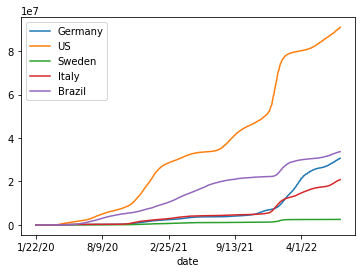

In [11]:
%matplotlib inline

df_plot.set_index('date').plot()

# Data handling for the feature date

### 1) Conversion of the feature date from 'string' format to 'datetime' format

### 2) Updating the chnaged format of the dataset date in dataframe df_plot

### 3) Storing the updated dataframe in csv format

In [12]:
df_plot

,date,Germany,US,Sweden,Italy,Brazil
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0
...,...,...,...,...,...,...
913,7/23/22,30331133,90398709,2533978,20608190,33555526
914,7/24/22,30331133,90410386,2533978,20660065,33591356
915,7/25/22,30476605,90567290,2533978,20684182,33621965
916,7/26/22,30598385,90733888,2533978,20772833,33659879


In [13]:
req_date=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # conversion to datetime format

time_str=[each.strftime('%Y-%m-%d') for each in req_date] # conversion back to date ISO norm (str) format

In [14]:
df_plot['date']=req_date

type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.head() # Here the dates now are in the datetime format with '%Y-%m-%d' notation

,date,Germany,US,Sweden,Italy,Brazil
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [17]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

#Storing the data in csv 

# Modeling the Relational data

In [18]:
# Again pulling and reading the data 

data_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301


In [19]:
# For better data handling we change some names of the features

pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})

 # As It cannot contain null values we put 'no in place of 'NAN'
    
pd_data_base['state']=pd_data_base['state'].fillna('no') 

In [20]:
# For better data handling and to have only the required features we drop non relevant columns (features)

pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)

pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,no,Albania,0,0,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,no,Algeria,0,0,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,no,Andorra,0,0,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,no,Angola,0,0,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301


In [21]:
# We need state/countries as columns i.e. features and thus we apply transpose to the existing dataframe 
#...such that we get the desired structure of the dataframe 

pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [22]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [23]:

# Conversion of the date in str format to datetime64[ns] with .astype command

pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [24]:
pd_relational_model.dtypes


date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [25]:
# Storing the workedout dataframe in csv

pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

# With different structure of the Johns Hopkins data set the state information of US is in a second file

In [26]:
# Pulling and reading the US data from Johns Hopkins Github dataset

data_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

pd_raw_US=pd.read_csv(data_path)

pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,17127,17186,17203,17232,17268,17268,17268,17349,17392,17425
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,60775,60903,61003,61127,61268,61268,61268,61519,61632,61756
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6138,6153,6168,6192,6205,6205,6205,6244,6258,6276
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6841,6850,6857,6872,6882,6882,6882,6909,6921,6930
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15747,15762,15791,15816,15846,15846,15846,15898,15924,15947


In [27]:
# Again dropping all the non relevant features of the above dataset

pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)

# Renaming the 'Province_State' feature to 'state'
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [28]:
# We need state/country as columns i.e. features and thus we apply transpose to the existing dataframe 
#...such that we get the desired structure of the dataframe 

pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'

pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime

pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


#  Updation of the large relational file with US data from above dataframe

In [29]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [30]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [32]:
# Storing the newly formed dataframe by concanating the US dataframe with earlier dataframe in csv

pd_relational_model_all.to_csv('../data/processed/All_COVID_relational_confirmed.csv',sep=';',index=False)

In [33]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

              date    state country  confirmed
260712  2020-01-22  Alabama      US          0
260713  2020-01-22  Alabama      US          0
260714  2020-01-22  Alabama      US          0
260715  2020-01-22  Alabama      US          0
260716  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3328663 2022-07-27  Wyoming      US      11229
3328664 2022-07-27  Wyoming      US       5968
3328665 2022-07-27  Wyoming      US          0
3328666 2022-07-27  Wyoming      US       2565
3328667 2022-07-27  Wyoming      US       1739

[3067956 rows x 4 columns]


# Verifying the Overall US data

In [34]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [35]:
check_US

,date,state,country,confirmed
260712,2020-01-22,Alabama,US,0
260713,2020-01-22,Alabama,US,0
260714,2020-01-22,Alabama,US,0
260715,2020-01-22,Alabama,US,0
260716,2020-01-22,Alabama,US,0
...,...,...,...,...
3328663,2022-07-27,Wyoming,US,11229
3328664,2022-07-27,Wyoming,US,5968
3328665,2022-07-27,Wyoming,US,0
3328666,2022-07-27,Wyoming,US,2565


In [36]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2022-07-23,US,90398709
2022-07-24,US,90410386
2022-07-25,US,90567290
